## Code 1

#### Importing the libraries

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import utils
import models

## Code 2

#### Checking if CUDA is available or not

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


## Code 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

## Code 4

#### Downloading the MNIST dataset of train and test

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

## Code 5

#### Defining batch size and loading test and train loader

In [6]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

## Code 6

#### Visualizing the some samples of train loader dataset

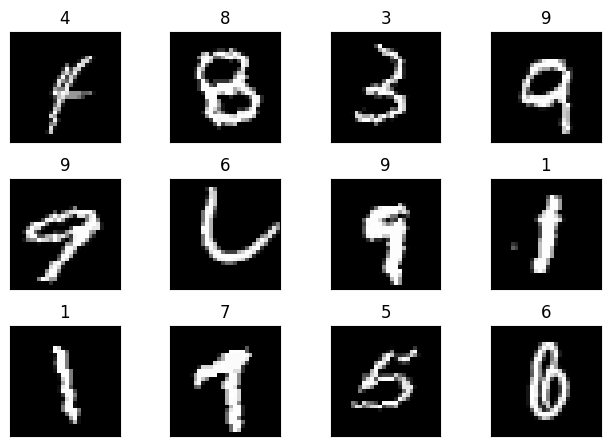

In [7]:
batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Code 7

In [8]:
## Sfhited this code to models.py file

## Code 8

In [9]:
### Shifted this code to utils file

## Code 9

In [10]:
from tqdm import tqdm

## Shifted this code to utils.py file

## Code 10

#### Define the epochs,optimizer,learning rate and finally running our model

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = models.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(model, device, train_loader, optimizer, criterion)
  utils.test(model, device, test_loader, criterion)
  scheduler.step()

D:\Softwares\anaconda3\envs\pytorch-gpu\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.0726 Batch_id=468 Accuracy=85.77: 100%|██████████| 469/469 [00:32<00:00, 14.40it/s]


Test set: Average loss: 0.0653, Accuracy: 9801/10000 (98.01%)

Epoch 2


Train: Loss=0.0409 Batch_id=468 Accuracy=97.35: 100%|██████████| 469/469 [00:32<00:00, 14.28it/s]


Test set: Average loss: 0.0409, Accuracy: 9869/10000 (98.69%)

Epoch 3


Train: Loss=0.1302 Batch_id=468 Accuracy=98.04: 100%|██████████| 469/469 [00:32<00:00, 14.48it/s]


Test set: Average loss: 0.0341, Accuracy: 9882/10000 (98.82%)

Epoch 4


Train: Loss=0.1228 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:32<00:00, 14.47it/s]


Test set: Average loss: 0.0304, Accuracy: 9899/10000 (98.99%)

Epoch 5


Train: Loss=0.0381 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:32<00:00, 14.55it/s]


Test set: Average loss: 0.0337, Accuracy: 9881/10000 (98.81%)

Epoch 6


Train: Loss=0.0218 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:32<00:00, 14.54it/s]


Test set: Average loss: 0.0238, Accuracy: 9927/10000 (99.27%)

Epoch 7


Train: Loss=0.1082 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:34<00:00, 13.64it/s]


Test set: Average loss: 0.0259, Accuracy: 9914/10000 (99.14%)

Epoch 8


Train: Loss=0.0385 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:34<00:00, 13.73it/s]


Test set: Average loss: 0.0221, Accuracy: 9926/10000 (99.26%)

Epoch 9


Train: Loss=0.0624 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:34<00:00, 13.72it/s]


Test set: Average loss: 0.0236, Accuracy: 9925/10000 (99.25%)

Epoch 10


Train: Loss=0.0184 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:34<00:00, 13.64it/s]


Test set: Average loss: 0.0193, Accuracy: 9932/10000 (99.32%)

Epoch 11


Train: Loss=0.0344 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:34<00:00, 13.75it/s]


Test set: Average loss: 0.0210, Accuracy: 9925/10000 (99.25%)

Epoch 12


Train: Loss=0.0099 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:34<00:00, 13.62it/s]


Test set: Average loss: 0.0241, Accuracy: 9916/10000 (99.16%)

Epoch 13


Train: Loss=0.0064 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:34<00:00, 13.71it/s]


Test set: Average loss: 0.0218, Accuracy: 9926/10000 (99.26%)

Epoch 14


Train: Loss=0.0082 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:34<00:00, 13.66it/s]


Test set: Average loss: 0.0279, Accuracy: 9907/10000 (99.07%)

Epoch 15


Train: Loss=0.0065 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:34<00:00, 13.61it/s]


Test set: Average loss: 0.0212, Accuracy: 9927/10000 (99.27%)

Epoch 16


Train: Loss=0.0014 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:34<00:00, 13.69it/s]


Test set: Average loss: 0.0160, Accuracy: 9944/10000 (99.44%)

Epoch 17


Train: Loss=0.0036 Batch_id=468 Accuracy=99.60: 100%|██████████| 469/469 [00:34<00:00, 13.68it/s]


Test set: Average loss: 0.0154, Accuracy: 9945/10000 (99.45%)

Epoch 18


Train: Loss=0.0033 Batch_id=468 Accuracy=99.63: 100%|██████████| 469/469 [00:34<00:00, 13.79it/s]


Test set: Average loss: 0.0154, Accuracy: 9943/10000 (99.43%)

Epoch 19


Train: Loss=0.0034 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:34<00:00, 13.62it/s]


Test set: Average loss: 0.0159, Accuracy: 9947/10000 (99.47%)

Epoch 20


Train: Loss=0.0029 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:33<00:00, 13.82it/s]


Test set: Average loss: 0.0147, Accuracy: 9946/10000 (99.46%)



## Code 11

#### Visualizing the training and test loss and training and testing accuracy

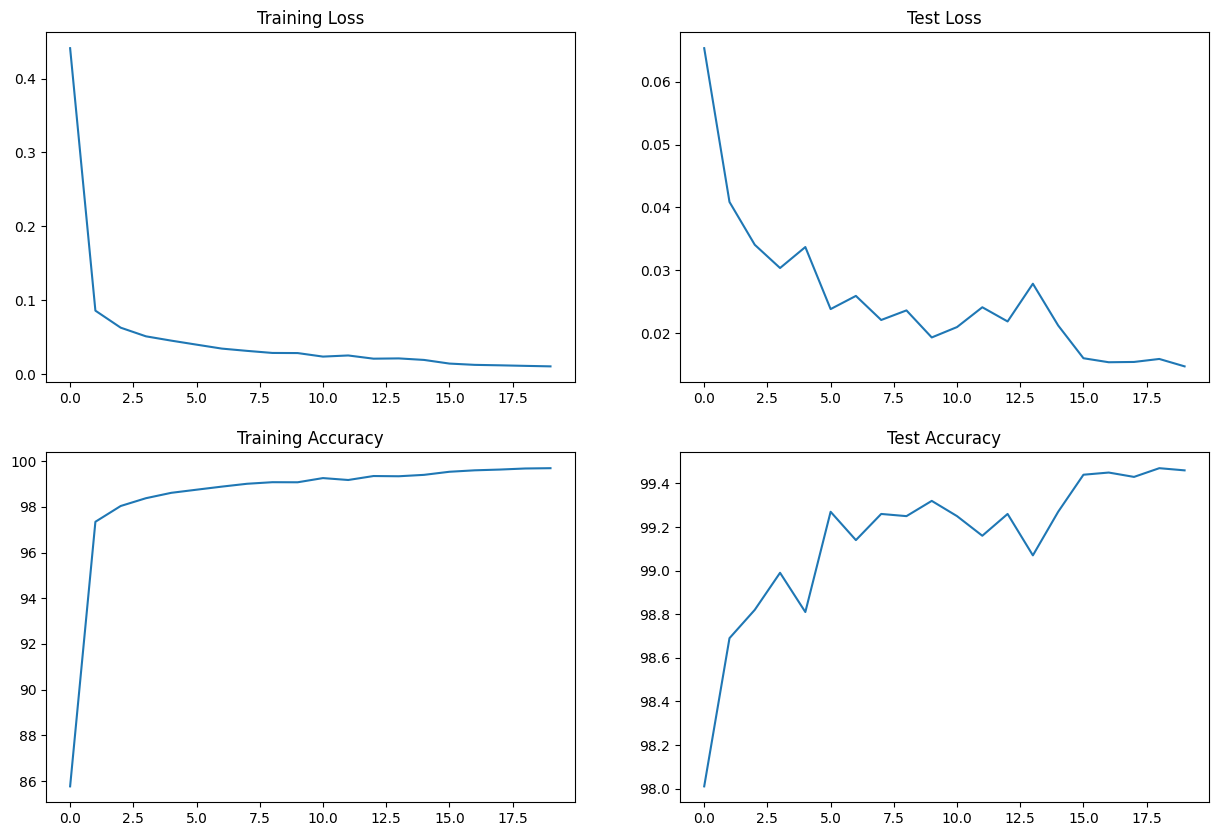

In [12]:
# shifted this code to utils
utils.visualize_loss_accuracy()

#### Printing the model summary to see its parameters

In [13]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------
